In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
data = pd.read_csv(r'C:\Users\ACER\Documents\47\4 Artificial intelligence TalentoTech\4. Clustering\Customers.csv')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [18]:
data = data.drop('CustomerID',axis=1)

In [19]:
data.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,Male,19,15000,39,Healthcare,1,4
1,Male,21,35000,81,Engineer,3,3
2,Female,20,86000,6,Engineer,1,1
3,Female,23,59000,77,Lawyer,0,2
4,Female,31,38000,40,Entertainment,2,6


In [21]:
profession = data['Profession']
data_sin_profesion = data.drop(columns=['Profession'])

In [23]:
data_sin_profesion.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,Male,19,15000,39,1,4
1,Male,21,35000,81,3,3
2,Female,20,86000,6,1,1
3,Female,23,59000,77,0,2
4,Female,31,38000,40,2,6


In [28]:
data_encoded = pd.get_dummies(data_sin_profesion, columns=['Gender']).astype(int)
data_encoded = data_encoded.drop(columns=['Gender_Male'])

In [29]:
data_encoded.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Gender_Female
0,19,15000,39,1,4,0
1,21,35000,81,3,3,0
2,20,86000,6,1,1,1
3,23,59000,77,0,2,1
4,31,38000,40,2,6,1


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()
data_sc = sc.fit_transform(data_encoded)

In [32]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=5)
data_pca = pca.fit_transform(data_sc)


In [37]:
print("Variabilidad explicada individual",pca.explained_variance_ratio_)
print("Variabilidad explicada acumulada",pca.explained_variance_ratio_.cumsum())

Variabilidad explicada individual [0.19036611 0.17375075 0.17051261 0.16568172 0.15509602]
Variabilidad explicada acumulada [0.19036611 0.36411686 0.53462947 0.70031118 0.8554072 ]


In [38]:
from sklearn.cluster import KMeans

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

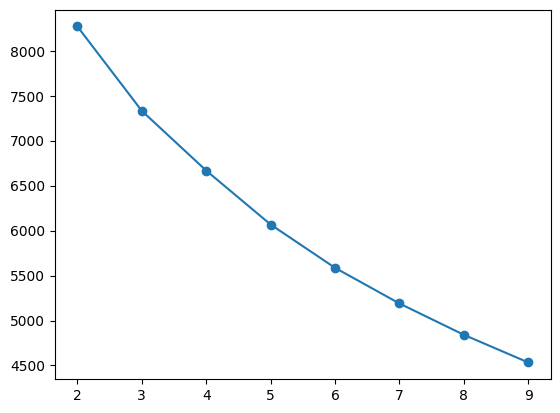

In [39]:
inercia = []

for i in range(2,10):
   cluster = KMeans(n_clusters=i,random_state=42)
   cluster.fit(data_pca)
   inercia.append(cluster.inertia_)

plt.plot(range(2,10),inercia,marker='o')
plt.show()

In [40]:
grupos = KMeans(n_clusters=6, random_state=42)
grupos.fit(data_pca)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=42)

In [41]:
print(grupos.labels_)

[3 3 1 ... 0 0 0]


In [43]:
dataset_pca = pd.DataFrame(data_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])
dataset_pca['Clusters'] = grupos.labels_

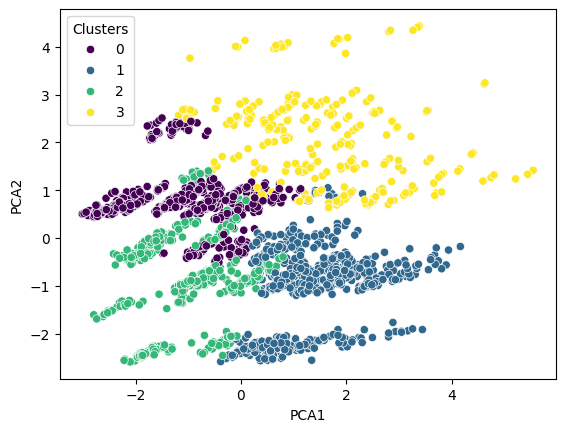

In [ ]:
sns.scatterplot(data=dataset_pca,x='PCA1',y='PCA2',hue='Clusters',palette='viridis')
plt.show()

In [44]:
data['Clusters'] = grupos.labels_

In [45]:
data.head()

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Clusters
0,Male,19,15000,39,Healthcare,1,4,3
1,Male,21,35000,81,Engineer,3,3,3
2,Female,20,86000,6,Engineer,1,1,1
3,Female,23,59000,77,Lawyer,0,2,4
4,Female,31,38000,40,Entertainment,2,6,1


In [46]:
data_segmentada = data.groupby('Clusters')

for label, data in data_segmentada:
    print(f'Cluster: {label}')
    print(data.head())

Cluster: 0
   Gender  Age  Annual Income ($)  Spending Score (1-100)  Profession  \
8    Male   64              97000                       3    Engineer   
57   Male   69               8000                      46      Doctor   
59   Male   53              89000                      46      Lawyer   
60   Male   70              84000                      56      Artist   
70   Male   70              91000                      55  Healthcare   

    Work Experience  Family Size  Clusters  
8                 0            3         0  
57                8            2         0  
59                1            6         0  
60                0            2         0  
70                8            2         0  
Cluster: 1
    Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
2   Female   20              86000                       6       Engineer   
4   Female   31              38000                      40  Entertainment   
6   Female   35              31000    

In [47]:
print(grupos.cluster_centers_)

[[-0.51602944 -0.75219982  0.32930948 -1.16205267 -0.04304774]
 [ 1.13275388 -0.74779872  0.09467072  0.74731004  0.17974884]
 [-0.59703367 -0.52070998 -1.03028008  0.39378564 -0.51028604]
 [ 0.27423166  0.84537436  0.65740865 -1.01305351  0.30475886]
 [ 0.60600197  1.00630043 -0.79033777  0.46829663 -0.0893689 ]
 [-0.77175591  0.36558608  0.69247509  1.20713274  0.19769681]]


In [48]:
print(data.groupby('Clusters').mean())

TypeError: agg function failed [how->mean,dtype->object]